CSV file 'term-test-1-result.csv' has been created successfully.
CSV file 'term-test-2-result.csv' has been created successfully.


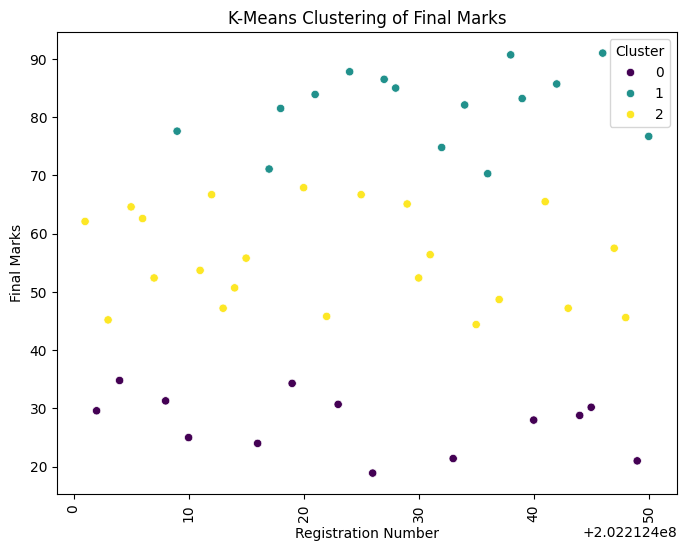

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Data lists
names = [
    "Mahia", "Swastika", "Arna", "Swarna", "Ruma", "Ayesha", "Nusrat", "Fahmida", "Tanisha", "Raisa",
    "Jannat", "Maliha", "Farzana", "Tania", "Labiba", "Sumaiya", "Nazifa", "Anika", "Mim", "Samia",
    "Tanzila", "Fatima", "Sadia", "Nadia", "Sabrina", "Ritu", "Raisa", "Tanha", "Sanaya", "Afia",
    "Mahi", "Eliza", "Nabila", "Tasnim", "Afsana", "Zarin", "Puja", "Shaila", "Sharmin", "Munia",
    "Mehjabin", "Sultana", "Nargis", "Hafsa", "Asma", "Sanjida", "Salma", "Huma", "Iffat", "Joya"
]
registration_numbers = np.arange(202212401, 202212451)
tt1_marks = [
    12, 14, 12, 9, 10, 6, 20, 11, 15, 5, 11, 14, 10, 5, 8, 10, 15, 7, 8, 5,
    13, 5, 17, 20, 10, 17, 19, 20, 10, 5, 5, 9, 10, 19, 17, 16, 20, 16, 11, 13,
    8, 17, 9, 8, 15, 17, 19, 11, 15, 13
]
tt2_marks = [
    15, 11, 19, 8, 8, 15, 17, 9, 17, 16, 7, 7, 19, 6, 17, 8, 7, 19, 16, 17,
    8, 7, 9, 5, 20, 14, 20, 7, 9, 11, 12, 16, 10, 17, 19, 5, 16, 18, 20, 15,
    15, 15, 7, 9, 15, 18, 5, 13, 14, 9
]

# Creating DataFrame for TT-1 results
df_tt1 = pd.DataFrame({
    "Registration Number": registration_numbers,
    "Name": names,
    "TT-1 Marks": tt1_marks
})

# Saving TT-1 results to CSV
filename_tt1 = "term-test-1-result.csv"
df_tt1.to_csv(filename_tt1, index=False)

print(f"CSV file '{filename_tt1}' has been created successfully.")

# Creating DataFrame for TT-2 results
df_tt2 = pd.DataFrame({
    "Registration Number": registration_numbers,
    "Name": names,
    "TT-2 Marks": tt2_marks
})

# Saving TT-2 results to CSV
filename_tt2 = "term-test-2-result.csv"
df_tt2.to_csv(filename_tt2, index=False)

print(f"CSV file '{filename_tt2}' has been created successfully.")


# Load TT-1 and TT-2 result files into separate DataFrames
tt1_df = pd.read_csv("term-test-1-result.csv")
tt2_df = pd.read_csv("term-test-2-result.csv")

# Merge dataframes on Registration Number
merged_df = pd.merge(tt1_df, tt2_df, on=['Registration Number', 'Name'])

# Create Best and Average Term Test Marks
merged_df['Best Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)
merged_df['Average Marks'] = merged_df[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)

# Drop TT-1 Marks and TT-2 Marks columns
merged_df.drop(columns=['TT-1 Marks', 'TT-2 Marks'], inplace=True)

# Generate attendance and term final marks
attendance_marks = np.random.randint(0, 11, size=50)
term_final_marks = np.random.randint(0, 101, size=50)

attendance_df = pd.DataFrame({
    'Registration Number': registration_numbers,
    'Attendance Marks': attendance_marks,
    'Term Final Marks': term_final_marks
})
attendance_df.to_csv("attendance_term_final.csv", index=False)

# Load attendance and term final data
attendance_df = pd.read_csv("attendance_term_final.csv")

# Merge with term test dataframe
final_df = pd.merge(merged_df, attendance_df, on='Registration Number')

# Compute final marks
final_df['Final Marks'] = final_df['Term Final Marks'] * 0.7 + final_df['Average Marks'] + final_df['Attendance Marks']

# Save final result to CSV
final_df.to_csv("final-result.csv", index=False)

# Clustering final marks
X = final_df[['Final Marks']]
kmeans = KMeans(n_clusters=3, random_state=42)
final_df['Cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=final_df['Registration Number'], y=final_df['Final Marks'], hue=final_df['Cluster'], palette='viridis')
plt.xlabel("Registration Number")
plt.ylabel("Final Marks")
plt.title("K-Means Clustering of Final Marks")
plt.legend(title="Cluster")
plt.xticks(rotation=90)
plt.show()